Simulating real-time ECG filtering...


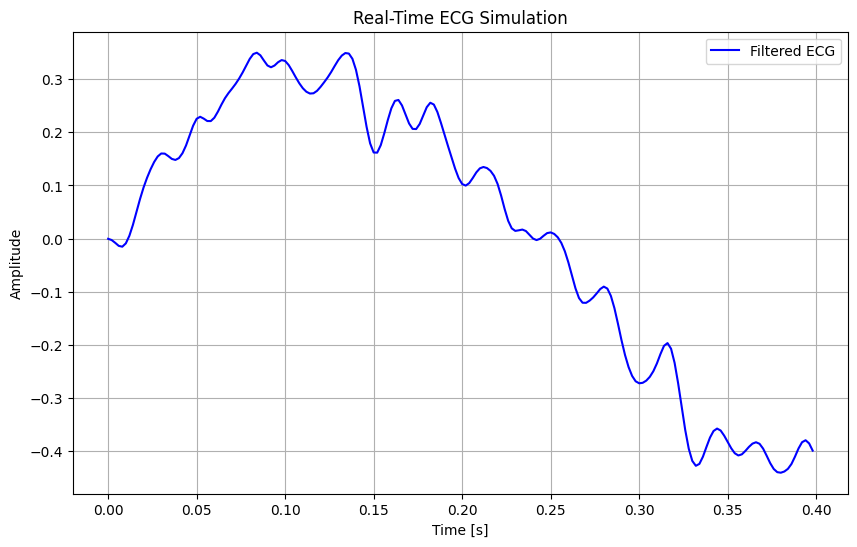

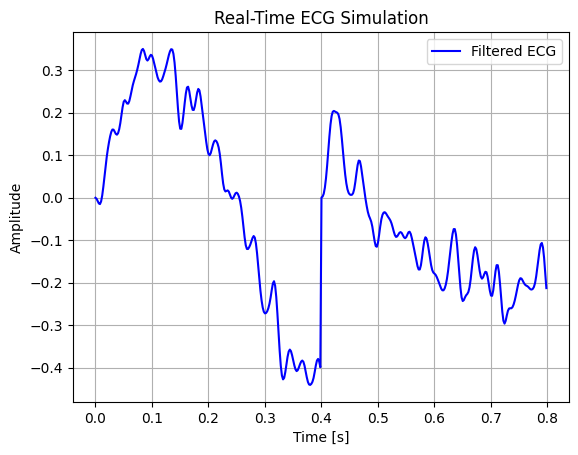

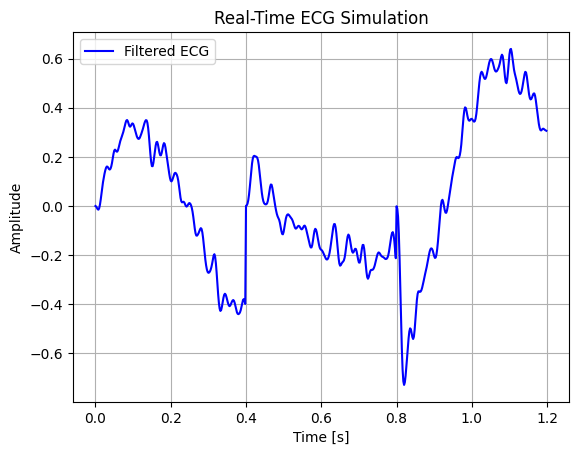

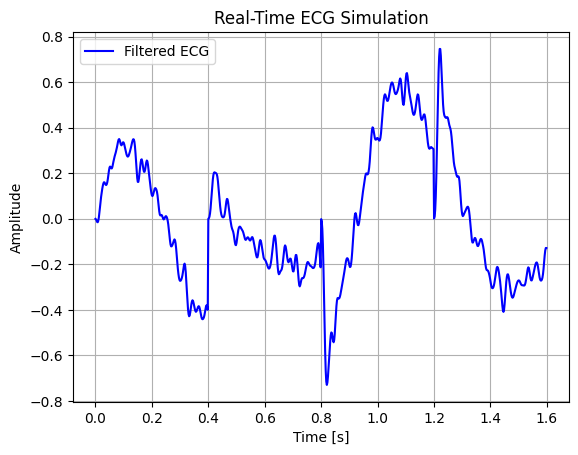

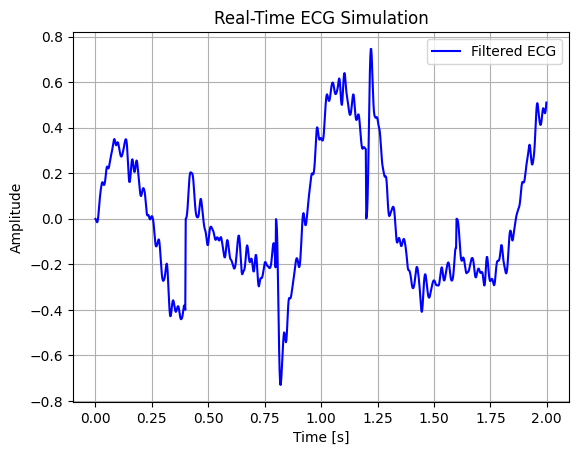

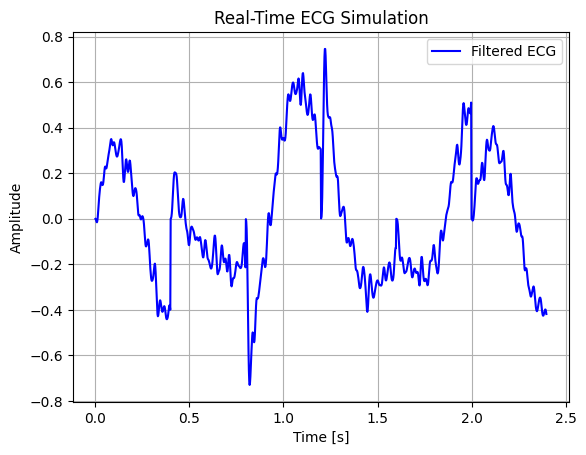

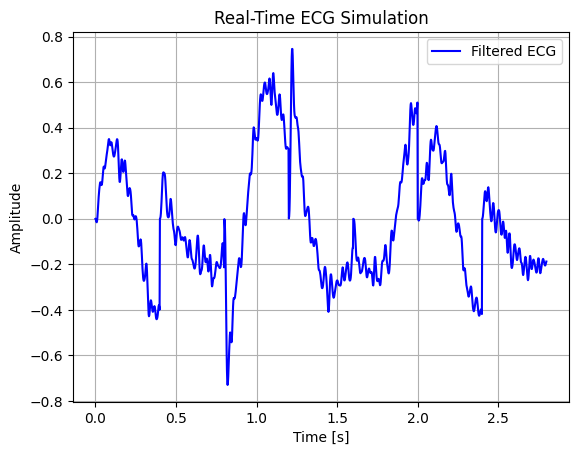

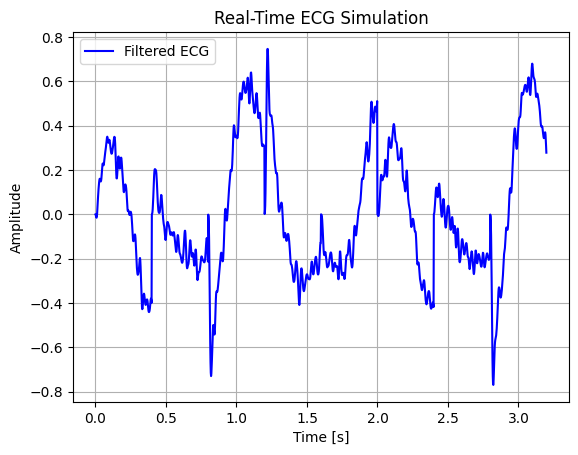

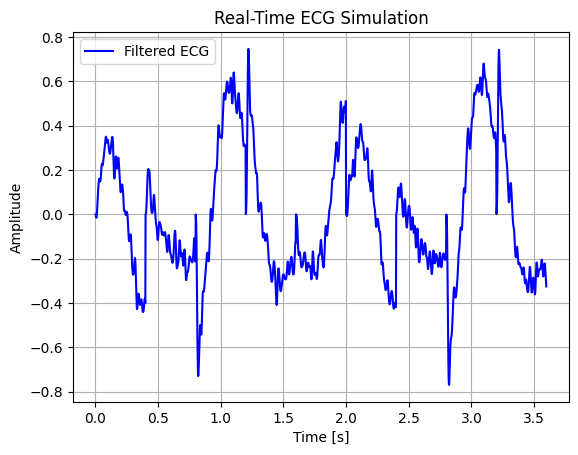

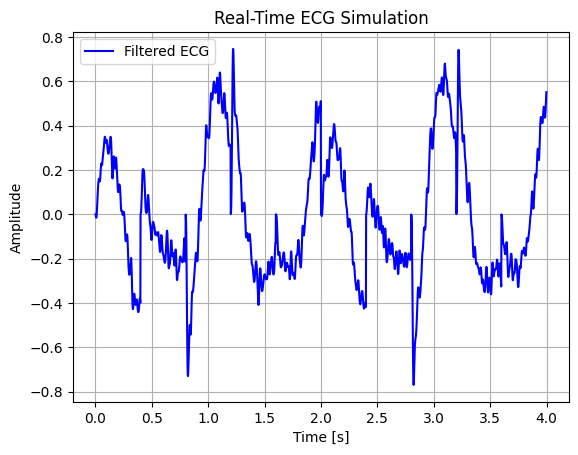

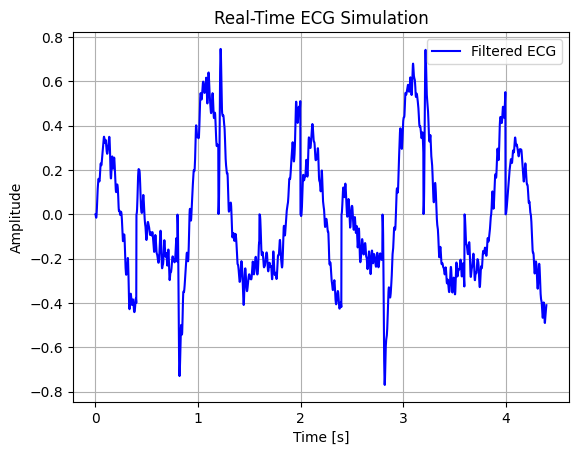

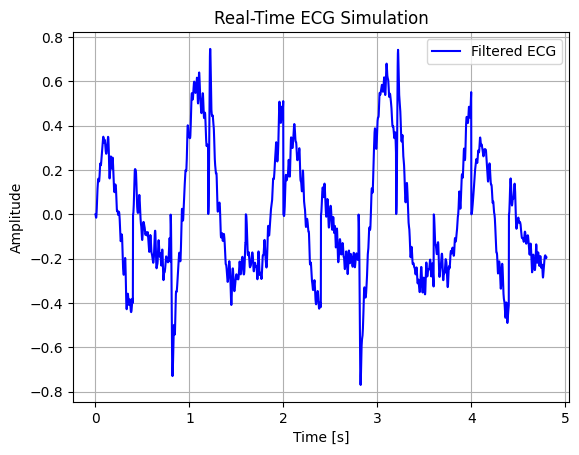

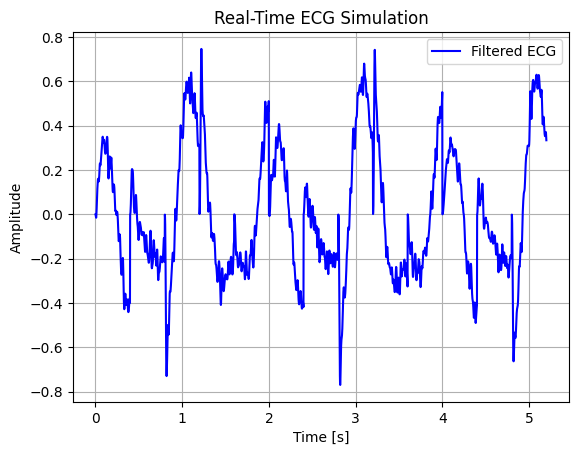

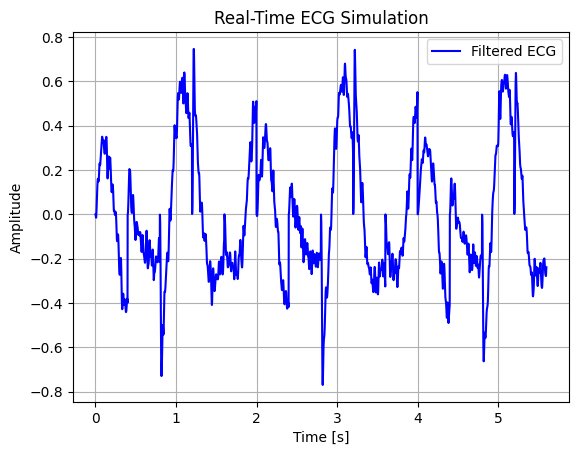

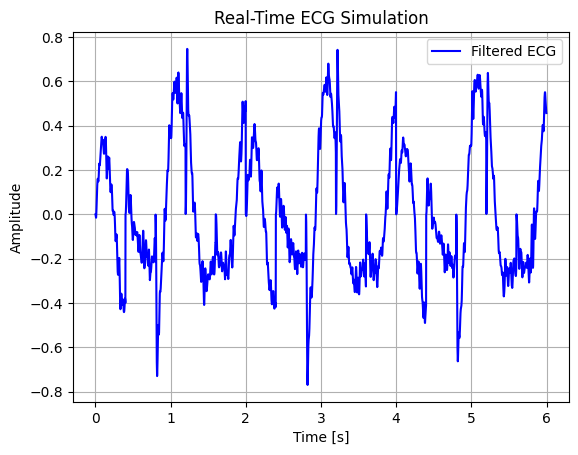

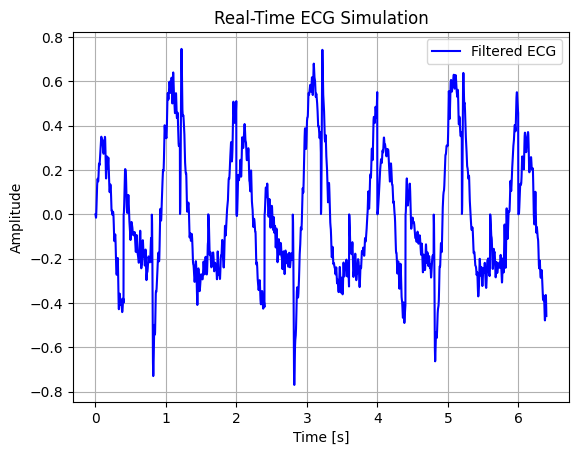

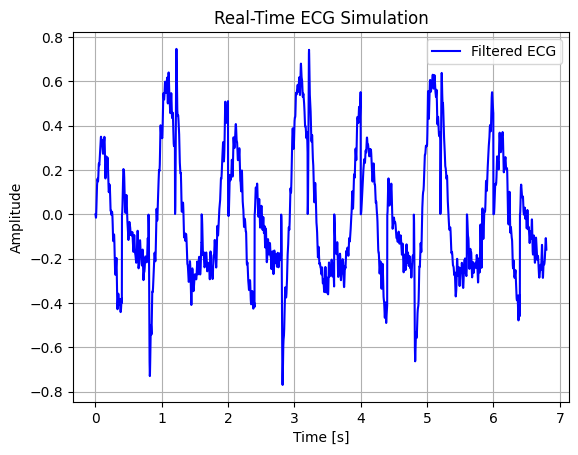

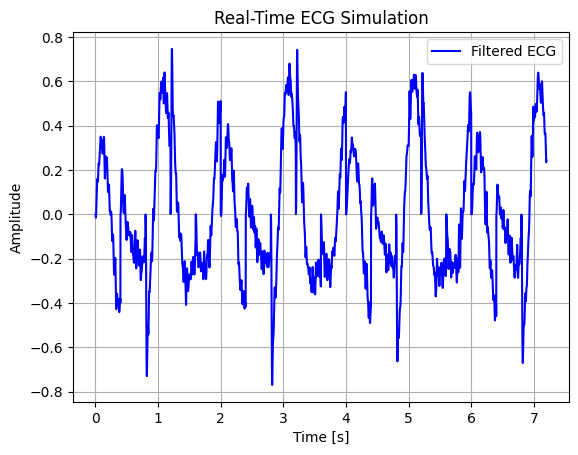

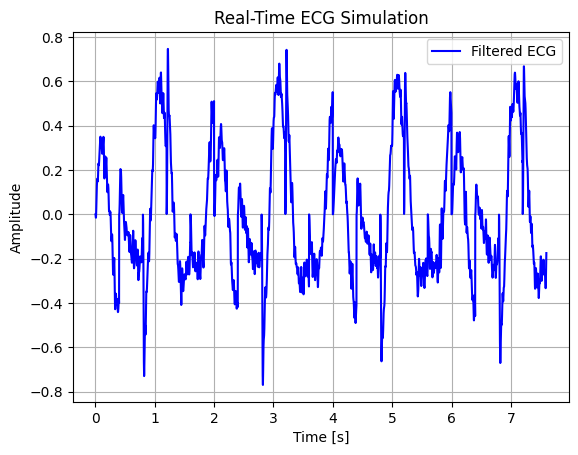

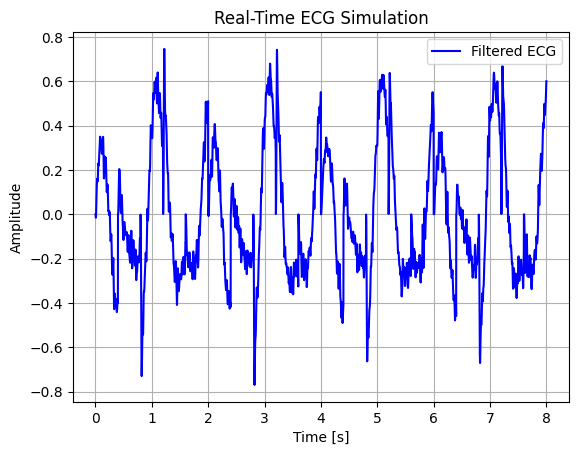

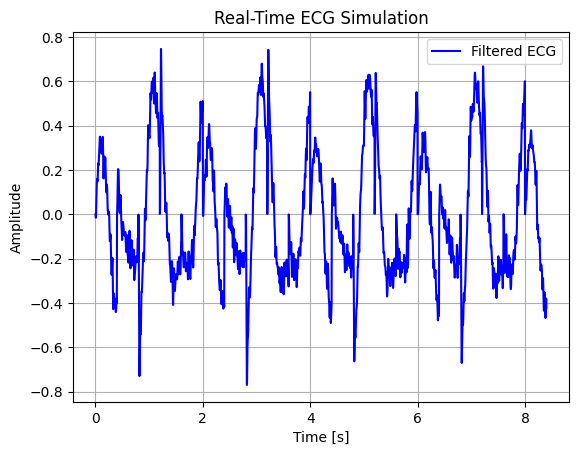

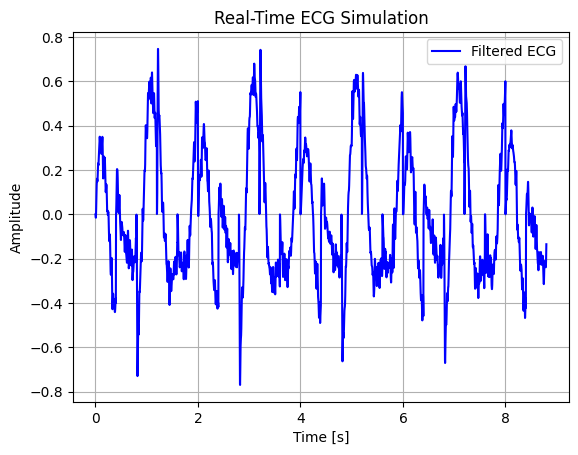

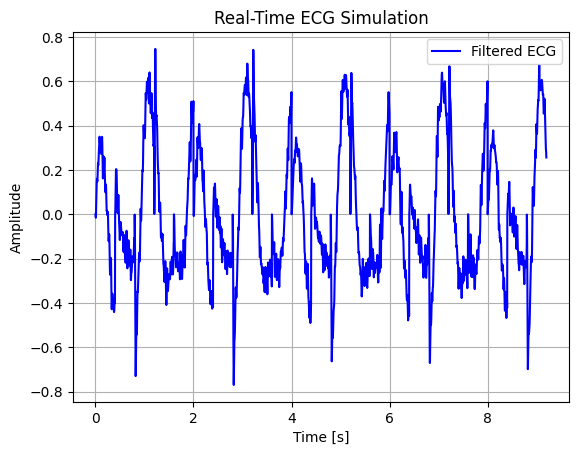

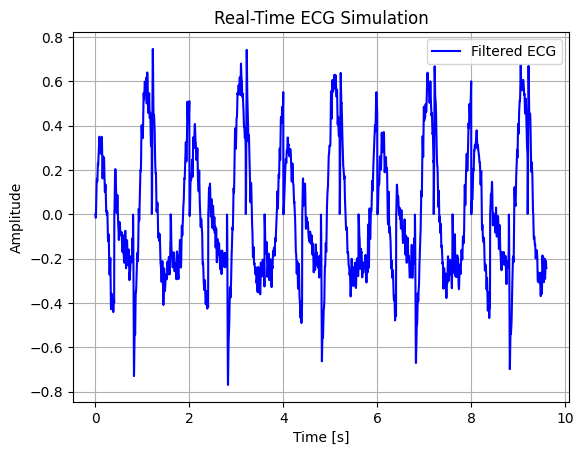

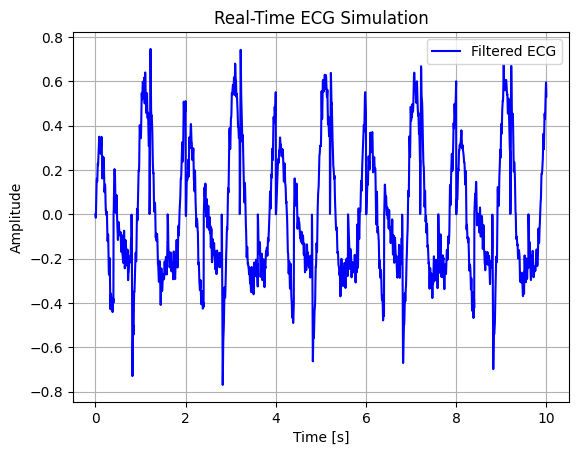

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from scipy.signal import butter, lfilter

def synthetic_ecg(fs, duration, heart_rate=60):
    t = np.linspace(0, duration, int(fs * duration))
    ecg = 0.6 * np.sin(2 * np.pi * heart_rate / 60 * t) \
          + 0.2 * np.sin(2 * np.pi * 2 * heart_rate / 60 * t) \
          + 0.1 * np.random.randn(len(t))
    return t, ecg

def bandpass_filter(signal, fs, lowcut=0.5, highcut=40.0, order=4):
    nyq = 0.5 * fs
    low, high = lowcut / nyq, highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return lfilter(b, a, signal)

def simulate_real_time_processing(ecg_signal, fs, block_size):
    total_samples = len(ecg_signal)
    num_blocks = total_samples // block_size
    delay = block_size / fs

    processed_signal = []
    t_axis = []

    print("Simulating real-time ECG filtering...")

    plt.figure(figsize=(10, 6))
    plt.ion() 

    for i in range(num_blocks):
        block = ecg_signal[i * block_size : (i + 1) * block_size]
        filtered = bandpass_filter(block, fs)
        processed_signal.extend(filtered)
        t_axis.extend(np.arange(i * block_size, (i + 1) * block_size) / fs)

      
        plt.clf()
        plt.plot(t_axis, processed_signal, label="Filtered ECG", color='blue')
        plt.xlabel("Time [s]")
        plt.ylabel("Amplitude")
        plt.title("Real-Time ECG Simulation")
        plt.grid(True)
        plt.legend()
        plt.pause(0.01)

        time.sleep(delay) 

    plt.ioff() 
    plt.show()


fs = 500  
duration = 10  
block_size = 200

t, ecg = synthetic_ecg(fs, duration)
simulate_real_time_processing(ecg, fs, block_size)

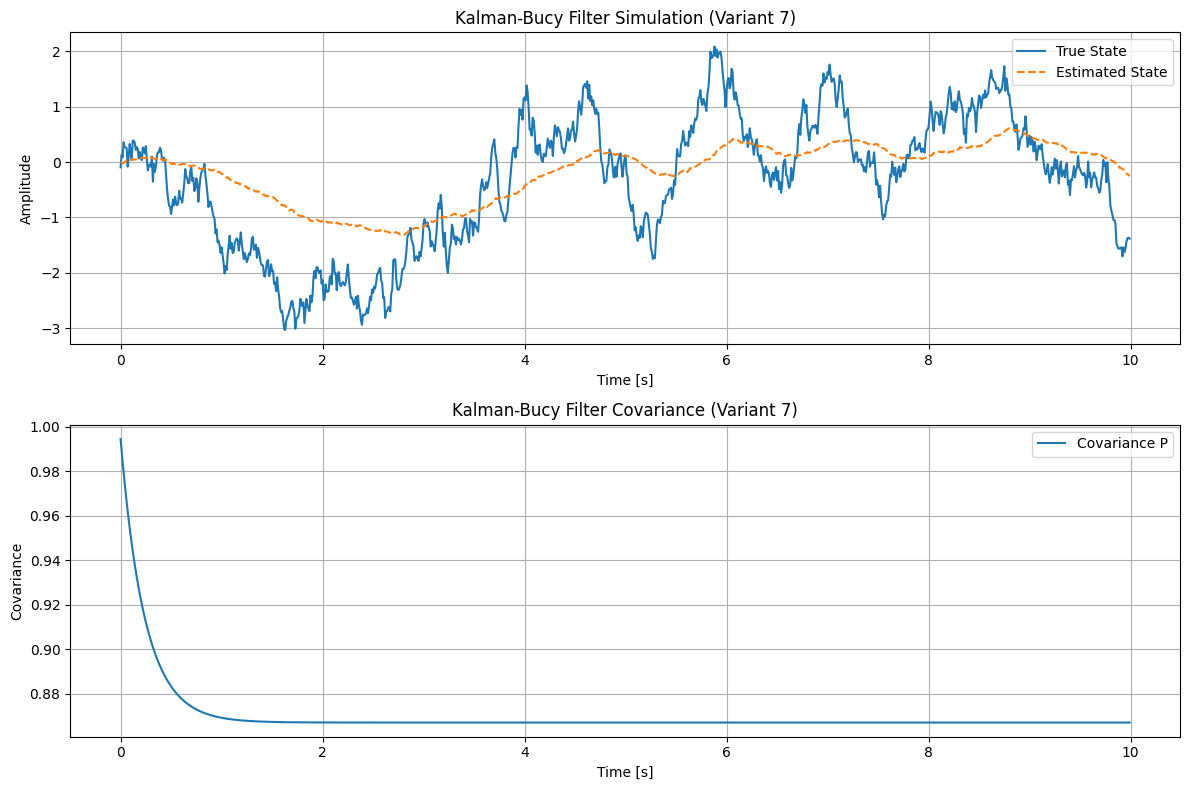

In [2]:
import numpy as np
import matplotlib.pyplot as plt


dt = 0.01
T = 10 
N = int(T / dt)

A = -0.9  
C = 1     
Q = 2.5  
R = 0.8   

P = 1.0   
x_true = 0.0 
x_hat = 0.0 

x_history = []
xhat_history = []
P_history = []

for k in range(N):
    # True system evolution
    w = np.random.normal(0, np.sqrt(Q * dt))
    x_true += dt * (A * x_true) + w

    # Measurement
    v = np.random.normal(0, np.sqrt(R))
    y = C * x_true + v

    # Kalman-Bucy update equations
    K = P * C / R
    x_hat += dt * (A * x_hat + K * (y - C * x_hat))
    P += dt * (2 * A * P + Q - K * C * P)

    # Store history
    x_history.append(x_true)
    xhat_history.append(x_hat)
    P_history.append(P)

# Plot results
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(np.arange(N) * dt, x_history, label="True State")
plt.plot(np.arange(N) * dt, xhat_history, label="Estimated State", linestyle="--")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.title("Kalman-Bucy Filter Simulation (Variant 7)")
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(np.arange(N) * dt, P_history, label="Covariance P")
plt.xlabel("Time [s]")
plt.ylabel("Covariance")
plt.title("Kalman-Bucy Filter Covariance (Variant 7)")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()